# My Notebook

In [269]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm
from sklearn.preprocessing import LabelEncoder
import numpy as np

relevant_cols = ['major_city', 'speed_down', 'speed_up', 'provider']

df1 = pd.read_csv("data/speed_price_att_other_cities.csv", usecols=relevant_cols)
df2 = pd.read_csv("data/speed_price_att.csv", usecols=relevant_cols)
df3 = pd.read_csv("data/speed_price_centurylink.csv", usecols=relevant_cols)
df4 = pd.read_csv("data/speed_price_earthlink.csv", usecols=relevant_cols)
df5 = pd.read_csv("data/speed_price_verizon.csv", usecols=relevant_cols)

df = pd.concat([df1, df2, df3, df4, df5])

In [270]:
df = df[['major_city', 'speed_down', 'speed_up', 'provider']]
df.drop(df[(df['speed_down'] == 0) | (df['speed_up'] == 0)].index, inplace=True)
print(df.shape)

df = df.sample(10000)
unique_cities = df['major_city'].unique()
print(unique_cities)
df.head(10)

(714799, 4)
['new york' 'houston' 'milwaukee' 'virginia beach' 'denver' 'los angeles'
 'atlanta' 'oklahoma city' 'kansas city' 'phoenix' 'staten island'
 'philadelphia' 'chicago' 'huntsville' 'detroit' 'columbus' 'bridgeport'
 'portland' 'baltimore' 'memphis' 'nashville' 'des moines' 'charlotte'
 'wilmington' 'sioux falls' 'brooklyn' 'seattle' 'little rock'
 'louisville' 'las vegas' 'charleston' 'providence' 'wichita' 'omaha'
 'newark' 'indianapolis' 'cleveland' 'washington' 'boston' 'queens'
 'jacksonville' 'billings' 'bronx' 'salt lake city' 'jackson' 'fargo'
 'albuquerque' 'new orleans' 'boise' 'cheyenne' 'minneapolis']


,major_city,speed_down,speed_up,provider
59124,new york,300.0,300.0,Verizon
387366,houston,100.0,20.0,AT&T
555510,milwaukee,6.0,1.0,EarthLink
281249,virginia beach,10.0,1.0,Verizon
104620,denver,10.0,1.0,EarthLink
19398,los angeles,5.0,1.0,AT&T
102100,atlanta,300.0,300.0,AT&T
412872,houston,300.0,300.0,AT&T
426884,oklahoma city,100.0,100.0,EarthLink
484122,houston,100.0,100.0,EarthLink


In [271]:
le = LabelEncoder()
df['major_city_encoded'] = le.fit_transform(df['major_city'])
city_encodings = dict()
for city in unique_cities:
    encoding = df[df['major_city'] == city]['major_city_encoded'].values[1]
    city_encodings[city] = encoding
print(city_encodings)
df['major_city'] = df['major_city_encoded']
df = df.drop('major_city_encoded', axis=1)
df.head(10)

{'new york': 34, 'houston': 19, 'milwaukee': 30, 'virginia beach': 47, 'denver': 15, 'los angeles': 27, 'atlanta': 1, 'oklahoma city': 36, 'kansas city': 24, 'phoenix': 39, 'staten island': 46, 'philadelphia': 38, 'chicago': 12, 'huntsville': 20, 'detroit': 17, 'columbus': 14, 'bridgeport': 6, 'portland': 40, 'baltimore': 2, 'memphis': 29, 'nashville': 32, 'des moines': 16, 'charlotte': 10, 'wilmington': 50, 'sioux falls': 45, 'brooklyn': 8, 'seattle': 44, 'little rock': 26, 'louisville': 28, 'las vegas': 25, 'charleston': 9, 'providence': 41, 'wichita': 49, 'omaha': 37, 'newark': 35, 'indianapolis': 21, 'cleveland': 13, 'washington': 48, 'boston': 5, 'queens': 42, 'jacksonville': 23, 'billings': 3, 'bronx': 7, 'salt lake city': 43, 'jackson': 22, 'fargo': 18, 'albuquerque': 0, 'new orleans': 33, 'boise': 4, 'cheyenne': 11, 'minneapolis': 31}


,major_city,speed_down,speed_up,provider
59124,34,300.0,300.0,Verizon
387366,19,100.0,20.0,AT&T
555510,30,6.0,1.0,EarthLink
281249,47,10.0,1.0,Verizon
104620,15,10.0,1.0,EarthLink
19398,27,5.0,1.0,AT&T
102100,1,300.0,300.0,AT&T
412872,19,300.0,300.0,AT&T
426884,36,100.0,100.0,EarthLink
484122,19,100.0,100.0,EarthLink


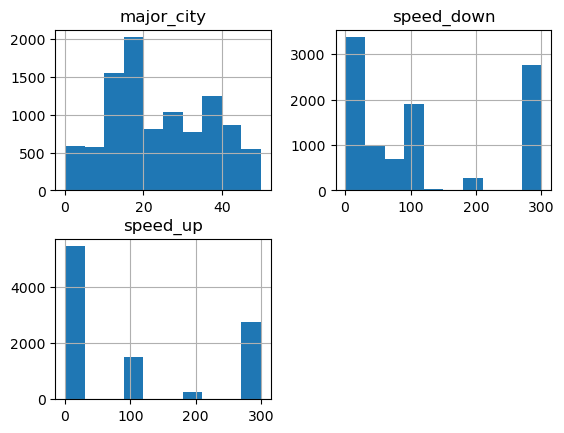

In [272]:
df.hist()
pyplot.show()

array([[<Axes: xlabel='major_city', ylabel='major_city'>,
        <Axes: xlabel='speed_down', ylabel='major_city'>,
        <Axes: xlabel='speed_up', ylabel='major_city'>],
       [<Axes: xlabel='major_city', ylabel='speed_down'>,
        <Axes: xlabel='speed_down', ylabel='speed_down'>,
        <Axes: xlabel='speed_up', ylabel='speed_down'>],
       [<Axes: xlabel='major_city', ylabel='speed_up'>,
        <Axes: xlabel='speed_down', ylabel='speed_up'>,
        <Axes: xlabel='speed_up', ylabel='speed_up'>]], dtype=object)

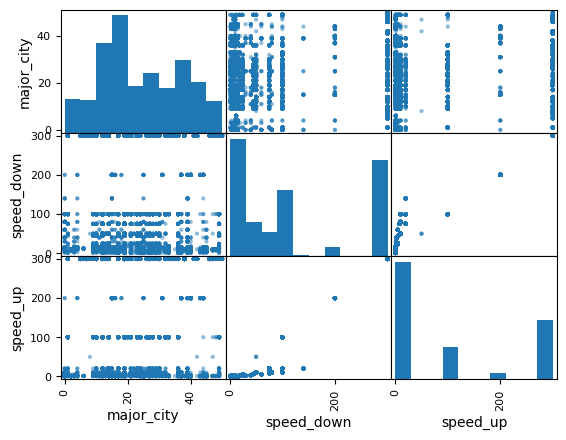

In [273]:
scatter_matrix(df)

0.6156666666666667


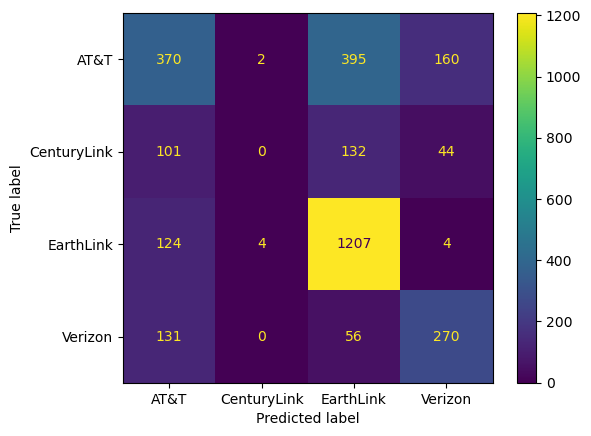

<bound method LabelEncoder.inverse_transform of LabelEncoder()>

In [274]:
mylog_model = linear_model.LogisticRegression(max_iter=1000)
# mysvm_model = svm.SVC(max_iter=1000)

y = df.values[:, 3] # dependent variable (prediction)
X = df.values[:, 0:3] # independent variables (used to make prediction)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)


mylog_model.fit(X_train, y_train)
# mysvm_model.fit(X_train, y_train)

y_pred_log = mylog_model.predict(X_test)
# y_pred_svm = mysvm_model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_log))
# print(metrics.accuracy_score(y_test, y_pred_svm))

cm = metrics.confusion_matrix(y_test, y_pred_log, labels=mylog_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mylog_model.classes_)
disp.plot()
pyplot.show()

le.inverse_transform

In [280]:
cities = []
for city in city_encodings:
    cities.append("'" + city + "'")
city_groups = np.array_split(cities, 7)

print("City Choices:")
for group in city_groups:
    print(", ".join(group))

func()

def func():
    input_city = input("Please enter a city from the list above: ")
    if input_city not in city_encodings:
        print("Invalid city.")
        return
    city = city_encodings[input_city]
    input_download = input("Please enter a download speed (Mbps): ")
    download = float(input_download)
    input_upload = input("Please enter an upload speed (Mbps): ")
    upload = float(input_upload)
    print("Customer's city: " + input_city.capitalize())
    print("Customer's download speed: " + str(download) + " Mbps")
    print("Customer's upload speed: " + str(upload) + " Mbps")
    prediction = mylog_model.predict([[city, download, upload]])
    print("The customer is most likely currently using: " + prediction[0])

City Choices:
'new york', 'houston', 'milwaukee', 'virginia beach', 'denver', 'los angeles', 'atlanta', 'oklahoma city'
'kansas city', 'phoenix', 'staten island', 'philadelphia', 'chicago', 'huntsville', 'detroit', 'columbus'
'bridgeport', 'portland', 'baltimore', 'memphis', 'nashville', 'des moines', 'charlotte'
'wilmington', 'sioux falls', 'brooklyn', 'seattle', 'little rock', 'louisville', 'las vegas'
'charleston', 'providence', 'wichita', 'omaha', 'newark', 'indianapolis', 'cleveland'
'washington', 'boston', 'queens', 'jacksonville', 'billings', 'bronx', 'salt lake city'
'jackson', 'fargo', 'albuquerque', 'new orleans', 'boise', 'cheyenne', 'minneapolis'
Customer's city: new york
Customer's download speed: 54.0 Mbps
Customer's upload speed: 26.0 Mbps
The customer is most likely currently using: EarthLink
